## <center>Актуальные вопросы в области науки о данных: Исследование контента на сайте Data Science Stack Exchange</center>
                                                            Проект выполнен: Резвухин Д.И., апрель 2022 г.                                                                                         

### Введение                                                                                                                  

В рамках реализации данного проекта мы представим, что являемся сотрудниками гипотетической компании, которая продвигает Data Science контент: книги, онлайн-статьи, видео или обучающие платформы. Перед командой стоит цель выбрать актуальную и востребованную информацию из области науки о данных для следующего цикла публикаций. 

Для достижения цели исследования, поставлена задача найти в интернете ответ на вопрос «Что сейчас интересует людей в области науки о данных?». Для решения многих проблем, возникающих при работе над кодом, многие IT-специалисты зачастую обращаются к сайту Stack Overflow. Однако Stack Overflow является лишь частью группы сайтов под названием Stack Exchange. В составе Stack Exchange есть множество сайтов, специализирующихся на различных областях, включая математику, физику, философию и науку о данных. Таким образом, мы можем обратиться к этому ресурсу, что выяснить, какой Data Science контент сейчас выглядит наиболее актуальным. 

Ниже приведены примеры популярных сайтов, которые образуют систему Stack Exchange:

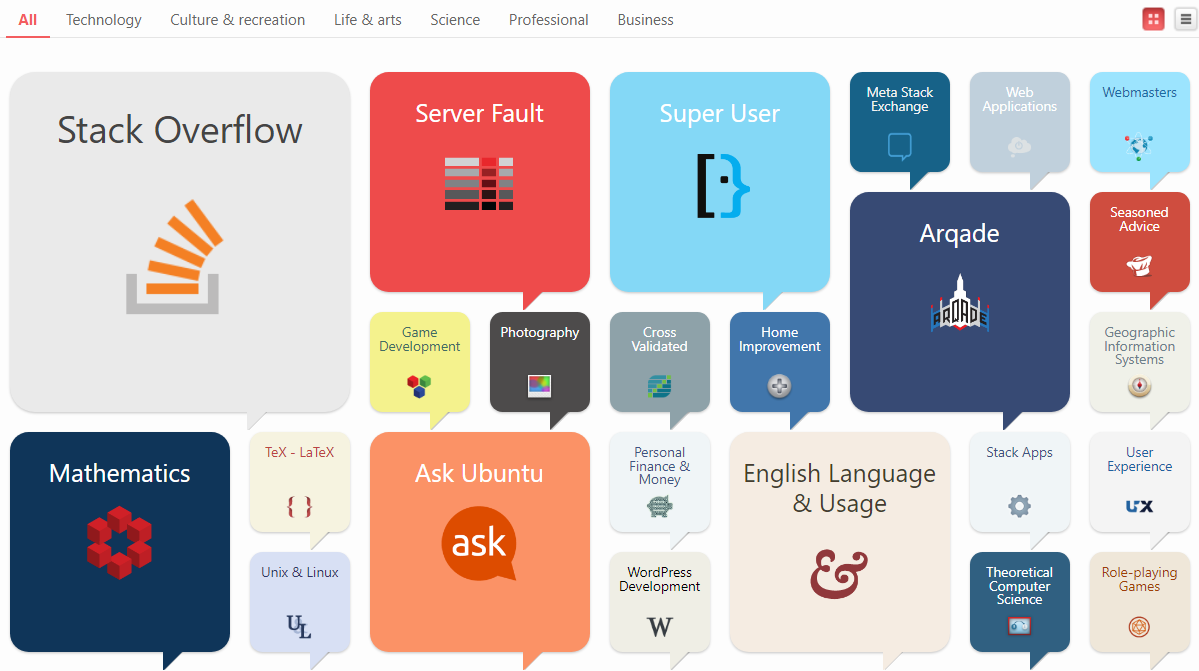

### 1. Предварительный анализ

Прежде всего нужно отметить, что все сайты в составе Stack Exchange используют систему репутации. Это означает, что каждый пост представляет собой вопрос или ответ, которому можно поставить как лайк, так и дизлайк. Это гарантирует, что полезные посты легко идентифицировать.

Поскольку наука о данных представляет собой междисциплинарную область, для выполнения задачи подходит несколько веб-сайтов из состава Stack Exchange:

* [Data Science](https://datascience.stackexchange.com/)
* [Cross Validated](https://stats.stackexchange.com/) 
* [Artificial Intelligence](https://ai.stackexchange.com/)
* [Mathematics](https://math.stackexchange.com/)
* [Stack Overflow](https://stackoverflow.com/)

Если мы хотим включить в проблематику область Data Engineering, то можно также рассмотреть следующие сайты:

* [Database Administrators](https://dba.stackexchange.com/)
* [Unix & Linux](https://unix.stackexchange.com/)
* [Software Engineering](https://softwareengineering.stackexchange.com/)

По этой [ссылке](https://stackexchange.com/sites?view=list#percentanswered) находится список всех ресурсов в составе Stack Exchange. Интересно, что по такому показателю как "процент вопросов, на которые дан ответ", портал [Data Science Stack Exchange](https://datascience.stackexchange.com/) находится на десятом месте с конца. Тот факт, что этот сайт специализируется на науке о данных, в сочетании с множеством неотвеченных вопросов, делает его идеальным источником информации для этого исследования.

### 2. Структура Data Science Stack Exchange

На [Data Science Stack Exchange ](https://datascience.stackexchange.com/) можно выделить следующие блоки информации:

* [Сами вопросы](https://datascience.stackexchange.com/questions)
* [Теги](https://datascience.stackexchange.com/tags)
* [Юзеры](https://datascience.stackexchange.com/users)
* [Неотвеченные вопросы](https://datascience.stackexchange.com/unanswered)

Система тегов на сайтах Stack Exchange устроена таким образом, что позволяет понять, сколько именно вопросов было задано на интересующую тематику:

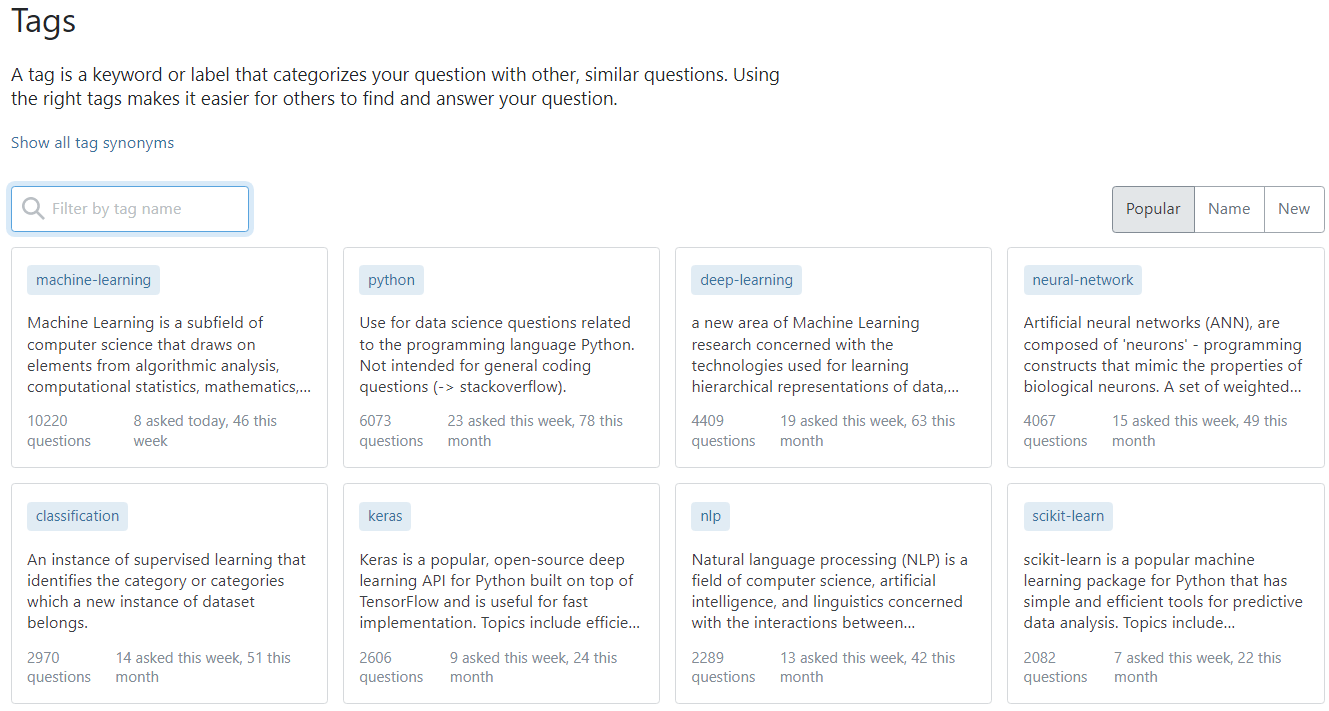

В каждом посте можно найти следующую информацию:

* Для вопросов и ответов доступна следующая информация:
    * Рейтинг поста
    * Заголовок
    * Автор
    * Тело поста
    
    
* Только для вопросов доступна также следующая информация:
    * Сколько пользователей добавили вопрос в избранное
    * Последняя активность
    * Число просмотров
    * Похожие вопросы
    * Теги

### 3. Stack Exchange Data Explorer

В ходе предварительного анализа становится понятно, что теги будут очень полезны при категоризации контента, избавляя нас от необходимости делать это самостоятельно.

Теперь возникает проблема доступа к данным. Одним из возможных решений может быть парсинг сайта. Однако в данном случае есть альтернатива. Stack Exchange предоставляет общедоступную базу данных для каждого из своих веб-сайтов. По [ссылке](https://data.stackexchange.com/datascience/query/new) доступен Stack Exchange Data Explorer (SEDE), с помощью которого можно составлять запросы к базе данных, используя диалект Transact-SQL. Схема базы данных содержит целый ряд различных таблиц:

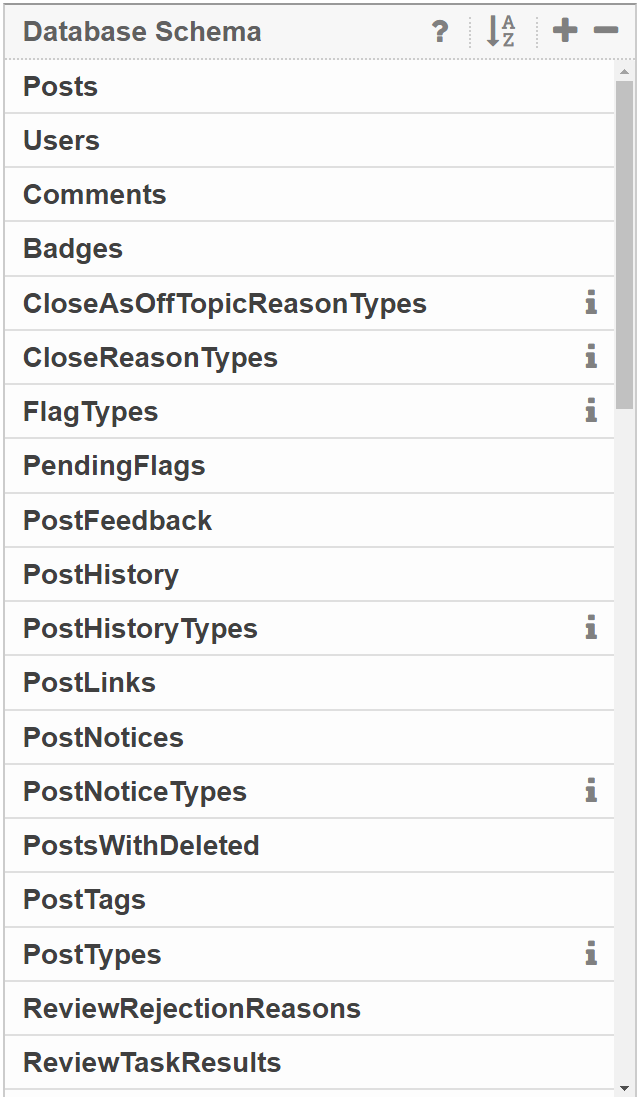

Наиболее ценной таблицей для выполнения исследования является таблица `Posts`. Однако эта таблица содержит множество столбцов. Для нас наиболее важны следующие:
* `Id` — уникальный идентификатор поста
* `PostTypeId` — идентификатор типа поста
* `CreationDate` — время создания
* `Score` — рейтинг
* `ViewCount` — количество просмотров
* `Tags` — использованные теги
* `AnswerCount` — количество полученных ответов (только для постов-вопросов)
* `FavoriteCount` — количество добавлений в избранное

Всего существует восемь типов постов, а именно:

1. Question
2. Answer
3. Wiki
4. TagWikiExcerpt
5. TagWiki
6. ModeratorNomination
7. WikiPlaceholder
8. PrivilegeWiki

Составим простой запрос и посмотрим количество постов каждого типа:

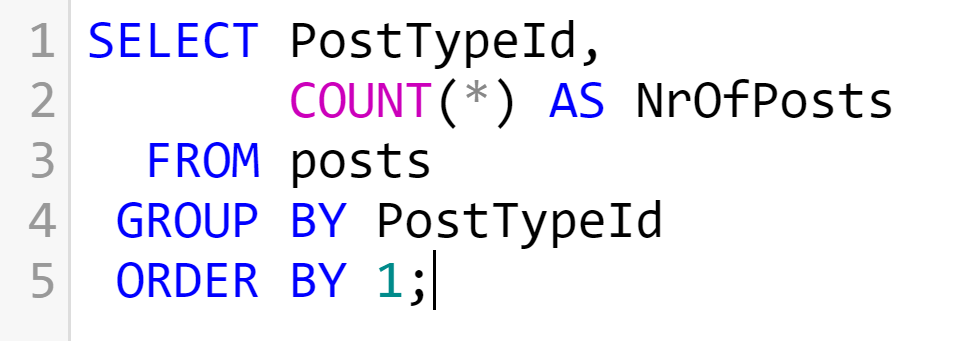

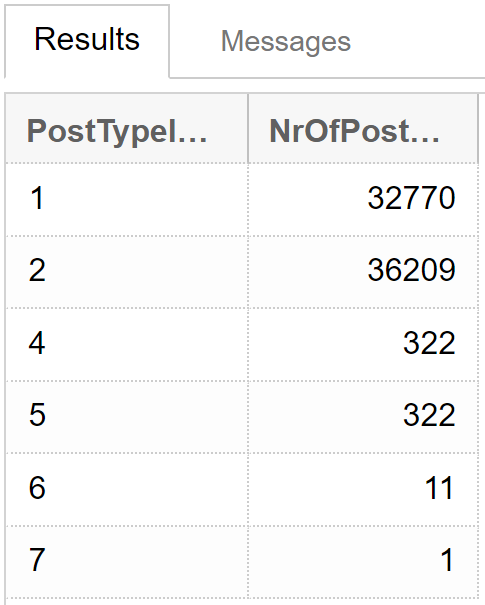

В основном для нас имеют значение только вопросы и в меньшей степени ответы, особенно учитывая, что такого контента подавляющее большинство. Поскольку нас интересуют только последние (актуальные) посты, мы ограничим наш анализ вопросами, заданными в 2021 году (проект выполняется в начале 2022 года).

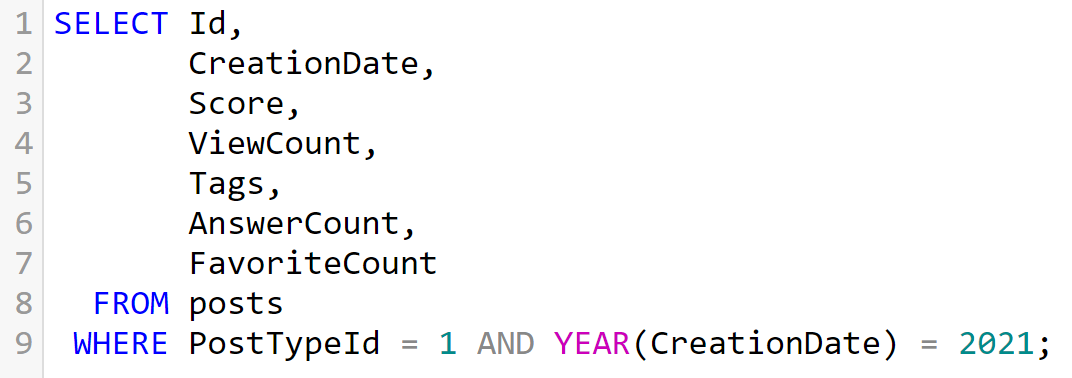

Системой возвращается 6252 ряда, каждый из которых представляет собой отдельный пост-вопрос. Результаты покрывают весь 2021 год с 1 января по 31 декабря. Для этих данных доступна генерация .csv файла, который можно скачать.

### 4. Создание датафрейма и очистка данных

Импортируем необходимые библиотеки и познакомимся с датасетом.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# улучшим качество графиков, переведя их в векторный формат svg
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')  

import seaborn as sns

questions_2021 = pd.read_csv('questions_2021.csv', parse_dates=['CreationDate'])
display(questions_2021)
display(questions_2021.info())

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,87391,2021-01-01 03:10:42,1,31,<decision-trees>,1,NaN
1,87392,2021-01-01 07:28:07,0,28,<machine-learning><python><deep-learning><imag...,1,NaN
2,87393,2021-01-01 08:07:33,1,21,<neural-network><deep-learning><inception>,0,NaN
3,87395,2021-01-01 10:31:51,1,43,<machine-learning><cloud><federated-learning>,1,1.0
4,87404,2021-01-01 18:00:21,1,58,<reinforcement-learning><openai-gym>,1,NaN
...,...,...,...,...,...,...,...
6247,106589,2021-12-31 14:19:06,0,14,<machine-learning><python><scikit-learn><data>...,1,NaN
6248,106592,2021-12-31 15:49:20,1,38,<deep-learning><overfitting>,2,NaN
6249,106593,2021-12-31 19:41:13,1,64,<feature-selection><markov-hidden-model>,2,NaN
6250,106596,2021-12-31 22:37:42,1,19,<machine-learning><linear-regression><cost-fun...,1,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6252 non-null   int64         
 1   CreationDate   6252 non-null   datetime64[ns]
 2   Score          6252 non-null   int64         
 3   ViewCount      6252 non-null   int64         
 4   Tags           6252 non-null   object        
 5   AnswerCount    6252 non-null   int64         
 6   FavoriteCount  562 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 342.0+ KB


None

Датафрейм выглядит в целом неплохо и не нуждается в серьезной чистке. Множество пропущенных значений наблюдается только в столбце `FavoriteCount`, но это просто означает, что такие посты с пропущенными значениями никогда не добавлялись в избранное; мы заменим значения NaN на ноль. Также необходимо немного видоизменить теги, а именно убрать угловые скобки, перечислить их через запятую и как вариант создать список.

In [2]:
questions_2021['FavoriteCount'] = questions_2021['FavoriteCount'].fillna(0).astype(int)
questions_2021['Tags'] = questions_2021['Tags'].str.strip('<') \
                                               .str.strip('>') \
                                               .str.split('><')
display(questions_2021.head())
display(questions_2021.info())

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,87391,2021-01-01 03:10:42,1,31,[decision-trees],1,0
1,87392,2021-01-01 07:28:07,0,28,"[machine-learning, python, deep-learning, imag...",1,0
2,87393,2021-01-01 08:07:33,1,21,"[neural-network, deep-learning, inception]",0,0
3,87395,2021-01-01 10:31:51,1,43,"[machine-learning, cloud, federated-learning]",1,1
4,87404,2021-01-01 18:00:21,1,58,"[reinforcement-learning, openai-gym]",1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             6252 non-null   int64         
 1   CreationDate   6252 non-null   datetime64[ns]
 2   Score          6252 non-null   int64         
 3   ViewCount      6252 non-null   int64         
 4   Tags           6252 non-null   object        
 5   AnswerCount    6252 non-null   int64         
 6   FavoriteCount  6252 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 317.6+ KB


None

### 5. Определение наиболее популярных тегов

Популярность (актуальность, востребованность) тегов можно оценить с использованием двух подходов. Первой заключается в том, чтобы посчитать частоту встречаемости каждого тега в пределах датафрейма. Второй подход предполагает подсчет количества просмотров постов-вопросов, у которых был указан соответствующий тег. 

Для начала обратимся к первому подходу, то есть посчитаем и сразу визуализируем частоту встречаемости тегов (для топ-30).

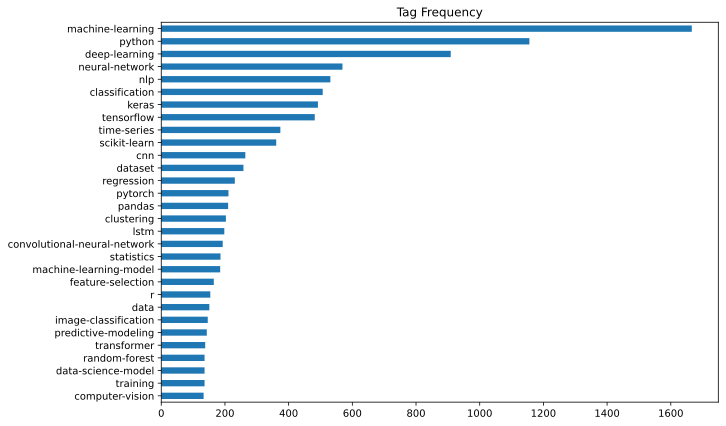

In [3]:
tags = []

for tag_group in questions_2021['Tags']:
    for tag in tag_group:
        tags.append(tag)
    
tags = pd.Series(tags, name='count_tag')
tag_frequency = tags.value_counts()
tag_frequency[:30].plot.barh(figsize=(10, 7)).invert_yaxis()
plt.title('Tag Frequency')
plt.show()

По этому критерию очень уверенным лидером является тег `machine-learning`, который встречается в каждом четвертом посте-вопросе за 2021 год. Этот тег опережает `python` и `deep-learning`, которые расположились на втором и третьем местах соответственно. В десятку лидеров также входят `neural-network`, `nlp`, `classification`, `keras`, `tensorflow`, `time-series` и `scikit-learn`.

Теперь проведем похожую процедуру, только для числа просмотров постов с соответствующими тегами:

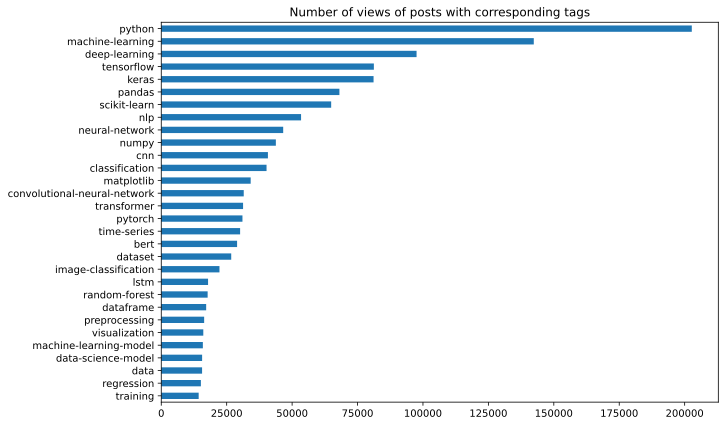

In [4]:
view_frequency = {}

for tag_group, count in zip(questions_2021['Tags'], questions_2021['ViewCount']):
    
    for tag in tag_group:
        if tag in view_frequency:
            view_frequency[tag] += count
        else:
            view_frequency[tag] = count
        
view_frequency = pd.Series(view_frequency, name='count_view')
view_frequency = view_frequency.sort_values(ascending=False)
view_frequency[:30].plot.barh(figsize=(10, 7)).invert_yaxis()
plt.title('Number of views of posts with corresponding tags')
plt.show()

В целом здесь наблюдается похожая картина, хотя и с некоторыми различиями. Так, лидирующий тег `python` опережает `machine-learning`, на третьем месте расположился `deep-learning`.  В десятку лидеров также входят `tensorflow`, `keras`, `pandas`, `scikit-learn`, `nlp`, `neural-network` и `numpy`. 

Отметим, что в данном топе нейронные сети находятся существенно ниже, чем в предыдущем. Также интересно, что в предыдущем топе библиотеки `pandas` и `numpy` вообще не входят в первую десятку. По-видимому, вопросы, часто возникающие при рутинной работе с датафреймами и numpy-массивами, обуславливают большое число просмотров постов с тегами `pandas` и `numpy`, хотя сами теги не являются столь популярными при создании новых тем.

### 6. Выявление тегов, существенно более популярных по одному из критериев

Определив в первом приближении наиболее востребованные в 2021 году технологии в области науки о данных, мы можем немного подробнее рассмотреть различия в полученных данных с использованием двух разных критериев. Так, можно посмотреть, какие теги есть в топ-30 `tag_frequency` (частота встречаемости тегов), но при этом нет в топ-30 `view_frequency` (количество просмотров постов-вопросов с соответствующими тегами). 

In [5]:
"""Для такой операции идеально подойдет `LEFT JOIN` и слияние по индексам 
   — отсутствующие в правом датафрейме значения превратятся в NaN"""

tag_frequency_df = pd.DataFrame(tag_frequency[:30])
view_frequency_df = pd.DataFrame(view_frequency[:30])

combined_tag = pd.merge(tag_frequency_df, view_frequency_df, how="left", 
                        left_index=True, right_index=True)
combined_tag_unique = combined_tag[combined_tag['count_view'].isnull()]
combined_tag_unique

,count_tag,count_view
clustering,203,NaN
statistics,186,NaN
feature-selection,165,NaN
r,154,NaN
predictive-modeling,143,NaN
computer-vision,133,NaN


Таких тегов шесть и они принадлежат ко второй (нижней) половине топ-30 наиболее часто встречаемых тегов. В целом, их можно охарактеризовать как связанные со статистикой и машинным обучением. R является языком программирования для статистической обработки данных и работы с графикой; на данный момент он в целом существенно менее популярен, чем Python. Таким образом, данные технологии имеют определенную (достаточно высокую) актуальность в сфере Data Science, однако при этом не обладают таким же высоким числом просмотров связанных с ними тем.

Так, например, язык R располагается на 22 месте по популярности своего тега, но при этом только на 39 месте по просмотрам постов-вопросов с тегом R. Аналогично, компьютерное зрение — на 30 месте по популярности своего тега (замыкает топ-30), однако только на 40 по просмотрам:

In [6]:
tag_frequency = pd.DataFrame(tag_frequency).reset_index()
display(tag_frequency[tag_frequency['index'] == 'r'])

view_frequency = pd.DataFrame(view_frequency).reset_index()
display(view_frequency[view_frequency['index'] == 'r'])

display(tag_frequency[tag_frequency['index'] == 'computer-vision'])
display(view_frequency[view_frequency['index'] == 'computer-vision'])

,index,count_tag
21,r,154


,index,count_view
38,r,10896


,index,count_tag
29,computer-vision,133


,index,count_view
39,computer-vision,10800


Теперь проведем аналогичную операцию, но, наоборот, посмотрим, какие теги есть в топ-30 датафрейма `view_frequency` (количество просмотров постов с соответствующими тегами), но при этом нет в топ-30 датафрейма `tag_frequency` (частота встречаемости тегов). 

In [7]:
combined_view = pd.merge(view_frequency_df, tag_frequency_df, how="left", 
                         left_index=True, right_index=True)
combined_view_unique = combined_view[combined_view['count_tag'].isnull()]
combined_view_unique

,count_view,count_tag
numpy,43789,NaN
matplotlib,34169,NaN
bert,28977,NaN
dataframe,17160,NaN
preprocessing,16390,NaN
visualization,16063,NaN


Здесь также 6 тегов, и в основном они связаны с более "практической" стороной вопроса, в частности, теги `numpy`, `matplotlib`, `dataframe`, `vizualization` и `preprocessing`. По видимому, относительно высокое число просмотров тем с такими тегами связано с тем, что в них описаны решения многих небольших проблем, с которыми сталкиваются аналитики данных и инженеры машинного обучения при написании кода и визуализации данных. При "гуглении" проблемы вероятнее всего ответ на вопрос будет найден именно на Stack Exchange.

Отметим, например, что тег `numpy` находится на 10 месте в топе просмотров тем с соответствующим тегом, но аж на 60 месте по популярности самого тега в темах.

In [8]:
display(view_frequency[view_frequency['index'] == 'numpy'])
display(tag_frequency[tag_frequency['index'] == 'numpy'])

,index,count_view
9,numpy,43789


,index,count_tag
59,numpy,69


Таким образом, нам удалось установить специфику тех критериев, которые мы использовали для оценки популярности тегов, и чем вызваны различия в полученных результатах.

### 7. Выявление взаимосвязанных тегов

Некоторые теги имеют между собой близкое родство. Например, `python` связан с `pandas`, потому что Pandas — это библиотека Python. Таким образом, возвращаясь к цели нашего проекта — если наш новый опубликованный контент будет про Pandas, то логично, что мы задействуем и тег Python. В то же время, некоторые теги обнаруживают отрицательную корреляцию и вместе либо не встречаются, либо встречаются очень редко. Например, Pandas и язык R совместно в темах 2021 года не встречались:

In [9]:
questions_2021[questions_2021["Tags"].apply(
    lambda tags: True if "r" in tags and "pandas" in tags else False
)]

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount


Как вариант, мы можем построить таблицу встречаемости тегов между собой. Это позволит определить, насколько часто каждая пара тегов встречается совместно. Начнем с составления списка тегов и далее создании пока пустой таблицы.

In [10]:
unique_tags = tag_frequency['index'].tolist()
associations = pd.DataFrame(index=unique_tags, columns=unique_tags)
associations.head()

,machine-learning,python,deep-learning,neural-network,nlp,classification,keras,tensorflow,time-series,scikit-learn,...,hpc,trax,windows,permutation-test,rasa-nlu,mean-shift,nosql,intuition,stacked-lstm,bahdanau
machine-learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deep-learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neural-network,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nlp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Далее нужно заполнить пустую таблицу значениями. Таблица очень большая, поэтому это займет определенное время (на ноутбуке автора примерно 25 секунд).

In [11]:
associations.fillna(0, inplace=True)

for tag_group in questions_2021['Tags']:
    associations.loc[tag_group, tag_group] += 1    

Выберем из этой таблицы кусочек, соответствующий топ-30 часто встречаемых тегов. Для остальных тегов сопоставление нас не интересует, так как такие теги встречаются относительно редко.

In [12]:
most_popular = associations.loc[tag_frequency_df.index, tag_frequency_df.index]
most_popular.head()

,machine-learning,python,deep-learning,neural-network,nlp,classification,keras,tensorflow,time-series,scikit-learn,...,feature-selection,r,data,image-classification,predictive-modeling,transformer,random-forest,data-science-model,training,computer-vision
machine-learning,1666,274,325,176,124,203,82,87,72,108,...,58,34,32,23,52,22,31,54,42,31
python,274,1156,118,64,99,68,130,119,83,148,...,27,10,32,17,18,13,24,29,12,17
deep-learning,325,118,909,179,74,57,139,135,43,11,...,5,3,11,39,9,40,1,23,23,57
neural-network,176,64,179,569,26,36,81,58,26,11,...,5,3,4,20,13,18,4,8,17,9
nlp,124,99,74,26,531,32,17,20,0,16,...,2,1,1,3,0,61,2,7,3,5


Для более удобного восприятия результататов, построим тепловую карту (heatmap). Чем темнее оттенок цвета в соответствующем квадрате, тем чаще соответствующие теги встречались совместно. Также, используя простой код, уберем лишнюю половину таблицы и повторяющиеся результаты:

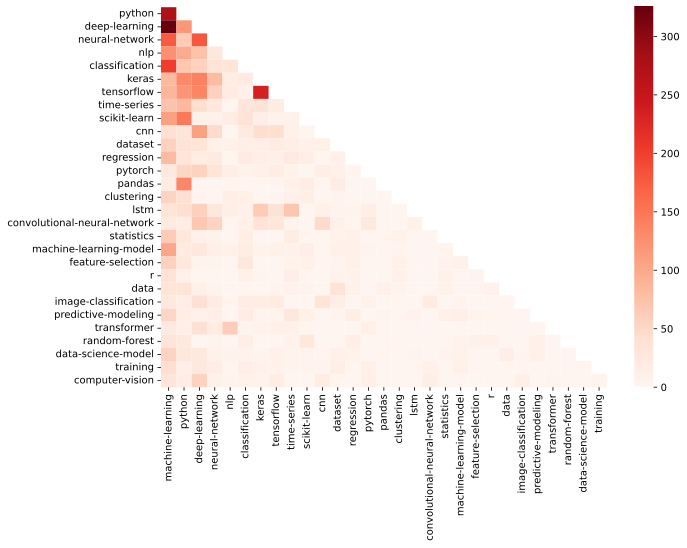

In [13]:
most_popular = most_popular.iloc[1:, :-1]
mask = np.triu(np.ones_like(most_popular), k=1)

plt.figure(figsize=(10, 7))
sns.heatmap(most_popular, cmap="Reds", mask=mask)
plt.show()

Как уже отмечалось, `pandas` часто встречается совместно с `python`. Помимо этого, очень высокие соответствия тегов обнаруживается у `machine-learning` и `neural-network`,  `machine-learning` и `classification`, а также между различными сочетаниями `deep-learning`, `keras` и `tensorflow`. Это логично, так как последние две технологии представляют собой библиотеки для реализации глубокого обучения. 

Таким образом, резюмируя полученные результаты, можно сделать вывод, что глубокое обучение (с учетом таких тегов как Keras и TensorFlow) являлось наиболее актуальным и востребованным направлением в Data Science, им активно интересовались пользователи в 2021 году. Однако нам необходимо дополнительно верифицировать данные и посмотреть, не является ли интерес к Deеp Learning кратковременной тенденцией.

### 8. Является ли популярность Deep Learning кратковременной?

В рамках ответа на этот вопрос создадим еще один SQL-запрос на Stack Exchange Data Explorer. Нас интересуют все посты-вопросы на этом сайте, чтобы можно было проследить историческую направленность. В частности, ответим на следующие вопросы:

* Сколько постов-вопросов создавалось за весь временной период? Информация о постах есть с 2014 года.
* Сколько постов-вопросов в области Deep Learning создавалось за этот временной период?
* Какова пропорция вопросов из области Deep Learning по отношению к общему количеству вопросов?

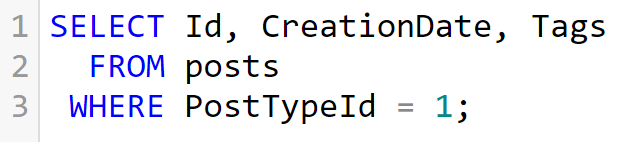<img src="query_3.png" width=300 align="left" />

Система возвращает 32851 ряда, каждый из которых представляет собой пост-вопрос. Скачаем .csv файл и создадим датафрейм.

In [14]:
all_questions = pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])
all_questions = all_questions.sort_values('CreationDate')
display(all_questions)
display(all_questions.info())

,Id,CreationDate,Tags
88,5,2014-05-13 23:58:30,<machine-learning>
89,7,2014-05-14 00:11:06,<education><open-source>
90,14,2014-05-14 01:25:59,<data-mining><definitions>
91,15,2014-05-14 01:41:23,<databases>
92,16,2014-05-14 01:57:56,<machine-learning><bigdata><libsvm>
...,...,...,...
32846,109832,2022-04-09 16:00:16,<python><neural-network><time-series>
32847,109833,2022-04-09 16:17:07,<neural-network><text-mining>
32848,109834,2022-04-09 16:17:36,<nlp><text-mining><sequence-to-sequence>
32849,109840,2022-04-10 01:03:05,<machine-learning><deep-learning><neural-network>


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32851 entries, 88 to 32850
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            32851 non-null  int64         
 1   CreationDate  32851 non-null  datetime64[ns]
 2   Tags          32851 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.0+ MB


None

Как и в случае с данными 2021 года, немного видоизменим данные в столбце `Tags`:

In [15]:
all_questions['Tags'] = all_questions['Tags'].str.strip('<') \
                                             .str.strip('>') \
                                             .str.split('><')
display(all_questions.head())

,Id,CreationDate,Tags
88,5,2014-05-13 23:58:30,[machine-learning]
89,7,2014-05-14 00:11:06,"[education, open-source]"
90,14,2014-05-14 01:25:59,"[data-mining, definitions]"
91,15,2014-05-14 01:41:23,[databases]
92,16,2014-05-14 01:57:56,"[machine-learning, bigdata, libsvm]"


Теперь нам предстоит определить, какие из тегов относятся к области Deep Learning. Знание предметной области позволяет отнести к глубокому обучению следующие теги: `lstm`, `cnn`, `scikit-learn`, `tensorflow`, `keras`, `neural-network`, `deep-learning`.

In [16]:
dl_tags = ['lstm', 'cnn', 'scikit-learn', 'tensorflow', 'keras', 'neural-network', 'deep-learning']

Далее создадим в датафрейме новый столбец, в котором будут нули и единицы в зависимости от того, относятся ли теги поста к сфере Deep Learning или нет.

In [17]:
def is_dl(tags):
    """Returns 1 (True) or 0 (False) depending on whether a post 
    contains Deep Learning tags"""
    for tag in tags:
        if tag in dl_tags:
            return 1
    return 0

all_questions['is_dl'] = all_questions['Tags'].apply(is_dl)
all_questions.tail()

,Id,CreationDate,Tags,is_dl
32846,109832,2022-04-09 16:00:16,"[python, neural-network, time-series]",1
32847,109833,2022-04-09 16:17:07,"[neural-network, text-mining]",1
32848,109834,2022-04-09 16:17:36,"[nlp, text-mining, sequence-to-sequence]",0
32849,109840,2022-04-10 01:03:05,"[machine-learning, deep-learning, neural-network]",1
32850,109842,2022-04-10 01:52:31,"[machine-learning, deep-learning, neural-network]",1


Далее нам нужно посчитать количество всех постов и количество постов, относящихся к сфере Deep Learning, с течением времени. Оптимальной градацией по времени будут кварталы (по три месяца). Напишем функцию, которая отнесет каждый пост к соответствующему временному промежутку на основе даты в столбце `CreationDate`:

In [18]:
def quarter(date):
    """Groups months parsed from datetime objects into quarters"""  
    year = date.year
    month = date.month
    
    if month in (1, 2, 3):
        n = 1
    elif month in (4, 5, 6):
        n = 2
    elif month in (7, 8, 9):
        n = 3
    else:
        n = 4    
    
    return f'{year}-Q{n}'

all_questions['quarter'] = all_questions['CreationDate'].apply(quarter)
all_questions.sample(5)

,Id,CreationDate,Tags,is_dl,quarter
26955,25884,2017-12-21 18:12:13,"[object-recognition, cnn]",1,2017-Q4
18659,94601,2021-05-18 13:39:09,"[nlp, named-entity-recognition, spacy]",0,2021-Q2
28084,26592,2018-01-13 12:50:38,"[nlp, rnn, automatic-summarization]",0,2018-Q1
21755,97551,2021-07-07 02:27:27,"[missing-data, data-imputation]",0,2021-Q3
14347,15765,2016-12-15 22:20:16,"[nlp, topic-model, sentiment-analysis]",0,2016-Q4


Далее построим бар-диаграммы для всех постов-вопросов в целом и Deep Learning-постов. На этот графике будет отображаться число постов в зависимости от времени, а также визуально видна пропорция DL-постов относительно общего количества:

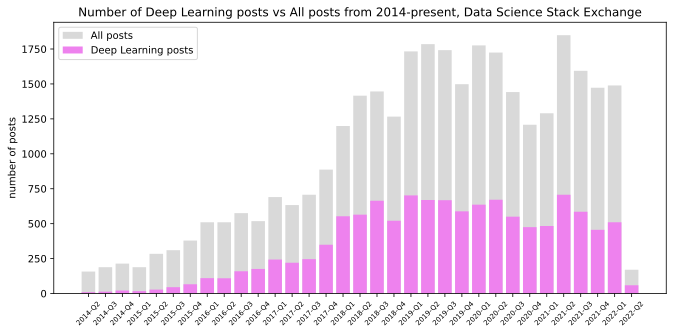

In [19]:
by_quarter = all_questions.groupby('quarter')
dl_by_quarter = by_quarter['is_dl'].sum()
posts_by_quarter = by_quarter.size()

fig, ax = plt.subplots(figsize=(11, 5))
ax.bar(posts_by_quarter.index, posts_by_quarter, label='All posts', color='grey', alpha=0.3)
ax.bar(dl_by_quarter.index, dl_by_quarter, label='Deep Learning posts', color='violet')
plt.title('Number of Deep Learning posts vs All posts from 2014-present, Data Science Stack Exchange', size=12)
plt.xticks(rotation=45, fontsize=7)
plt.ylabel('number of posts')

ax.legend()
plt.show()

### Выводы

C 2014 года наблюдается мощный рост интереса к сфере Deep Learning, который продлился вплоть до третьего квартала 2018 года. Далее прослеживается устойчивое плато. В настоящее время, посты, содержащие теги из категории Deep Learning, составляют около 40% от всех постов-вопросов. На первый взгляд можно заметить некоторое снижение количества DL-постов в последние пару лет, но на самом деле такое снижение всегда связано со снижением общего числа постов на платформе. Низкое значение во втором квартале 2022 года обусловлено тем, что на момент написания проекта этот временной интервал еще продолжается. 

Таким образом, проведенный анализ показывает, что направление Deep Learning является действительно актуальным у пользователей, а его популярность не является результатом каких-то скоротечных трендов. Возвращаясь к цели нашего проекта, можно рекомендовать выбрать в качестве темы для нового цикла публикаций сферу Deep Learning, библиотеки Python, направленные на реализацию DL-проектов, DL-платформы и т.д.